<a href="https://colab.research.google.com/github/brrikcy/deep-learning/blob/main/DL_EXP_03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Loading image from built in dataset**

importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import os

Loading the dataset

In [ ]:
keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Normalizing the data

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

NameError: name 'x_train' is not defined

Encoding the data

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Model architecture

In [ ]:
model1 = Sequential()
# convolution layer 1
model1.add(Conv2D(32,kernel_size= (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#covolution layer 2
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# convolution layer 3
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#convolution layer 4
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#flatten layer
model1.add(Flatten())
#  fully connected dense layer1
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# dropout for regularisation
model1.add(Dropout(0.5))
#output layer using softmax activation
model1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compilation

In [ ]:
model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

NameError: name 'model1' is not defined

Model summary

In [ ]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [ ]:
history = model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 184s 231ms/step - accuracy: 0.2863 - loss: 1.9497 - val_accuracy: 0.5358 - val_loss: 1.3100
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 226ms/step - accuracy: 0.5512 - loss: 1.2667 - val_accuracy: 0.6220 - val_loss: 1.0729
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 179s 228ms/step - accuracy: 0.6486 - loss: 1.0154 - val_accuracy: 0.6930 - val_loss: 0.8868
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 227ms/step - accuracy: 0.7063 - loss: 0.8499 - val_accuracy: 0.7189 - val_loss: 0.8112
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 228ms/step - accuracy: 0.7600 - loss: 0.7078 - val_accuracy: 0.7355 - val_loss: 0.7689
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 220ms/step - accuracy: 0.7901 - loss: 0.6072 - val_accuracy: 0.7294 - val_loss: 0.8037
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 224ms/step - accuracy: 0.8245 - loss: 0.5041 - val_accuracy: 0.7378 - val_loss: 0.7961
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 209s 232ms/step - accuracy: 0.8531 -

Model evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.0875 - loss: 3.3583
Test accuracy: 8.67%


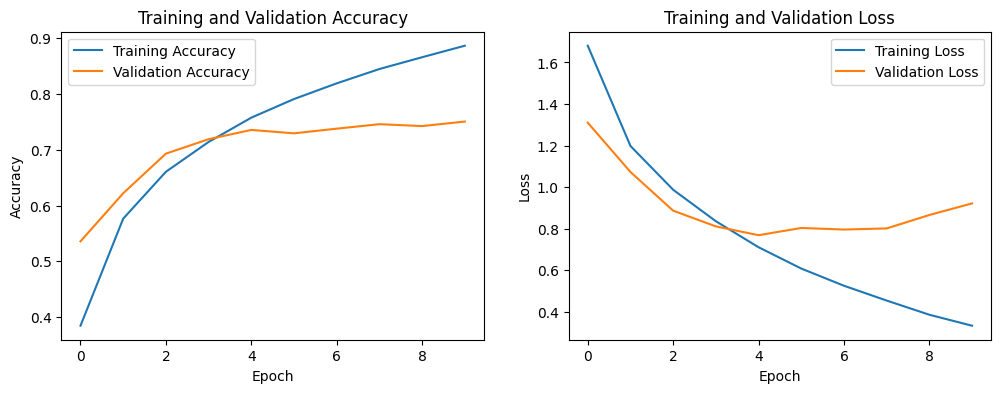

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# **B,C. Load image from local directory and plotting confusion matrix**

In [ ]:

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import os
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading DAtaset from Local Dirrectory
train_dir = '/content/drive/MyDrive/DL Datasets/Dog breed/Training' #training dataset for Different breeds fo dogs are loaded
test_dir = '/content/drive/MyDrive/DL Datasets/Dog breed/Validation' #testing set for different breeds of dogs are loaded


In [ ]:
# ImageDataGenerator for data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=20,           # Random rotations
    width_shift_range=0.2,       # Random horizontal shifts
    height_shift_range=0.2,      # Random vertical shifts
    shear_range=0.2,             # Shearing transformations
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Randomly flip images
    fill_mode='nearest'          # Fill in empty pixels
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation/test



In [ ]:

# Loading data from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),         # Resize all images to 32x32
    batch_size=64,
    class_mode='categorical'      # Multi-class classification
)

Found 567 images belonging to 10 classes.


In [ ]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),         # Resize all images to 32x32
    batch_size=64,
    class_mode='categorical'
)


Found 400 images belonging to 10 classes.


In [ ]:
# CNN model
model = Sequential()
# Convolution layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolution layer 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolution layer 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolution layer 4
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer
model.add(Flatten())
# Fully connected dense layer 1
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# Dropout for regularization
model.add(Dropout(0.5))
# Output layer
model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 231s 15s/step - accuracy: 0.0907 - loss: 2.9144 - val_accuracy: 0.1050 - val_loss: 2.3002
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.0993 - loss: 2.3303 - val_accuracy: 0.1000 - val_loss: 2.2950
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.1247 - loss: 2.2949 - val_accuracy: 0.1000 - val_loss: 2.3011
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 707ms/step - accuracy: 0.1021 - loss: 2.3101 - val_accuracy: 0.1425 - val_loss: 2.2958
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.0907 - loss: 2.3004 - val_accuracy: 0.1300 - val_loss: 2.2952
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.0872 - loss: 2.2929 - val_accuracy: 0.0900 - val_loss: 2.2873
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.1076 - loss: 2.2961 - val_accuracy: 0.1325 - val_loss: 2.2794
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.1114 - loss: 2.2880 - val_accuracy: 0.1850 - val_loss: 2.2740

In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - accuracy: 0.1894 - loss: 2.2462
Test accuracy: 18.75%


In [ ]:
# 1. Predict the classes for the validation (test) dataset
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# 2. Get the true labels from the validation generator
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
                    precision    recall  f1-score   support

            Beagle       0.00      0.00      0.00        40
             Boxer       0.10      0.17      0.13        40
           Bulldog       0.13      0.10      0.11        40
         Dachshund       0.00      0.00      0.00        40
   Germen_Shepherd       0.08      0.30      0.12        40
  Golden_Retriever       0.00      0.00      0.00        40
Labrador_Retriever       0.00      0.00      0.00        40
            Poodle       0.09      0.28      0.13        40
        Rottweiler       0.10      0.03      0.04        40
 Yorkshire_Terrier       0.00      0.00      0.00        40

          accuracy                           0.09       400
         macro avg       0.05      0.09      0.05       400
      weighted avg       0.05      0.09      0.05       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


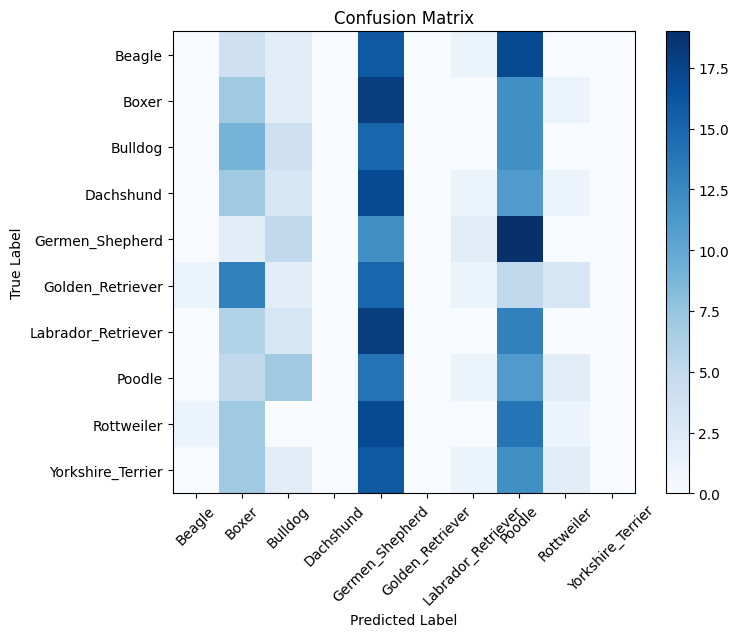

In [ ]:

# Plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

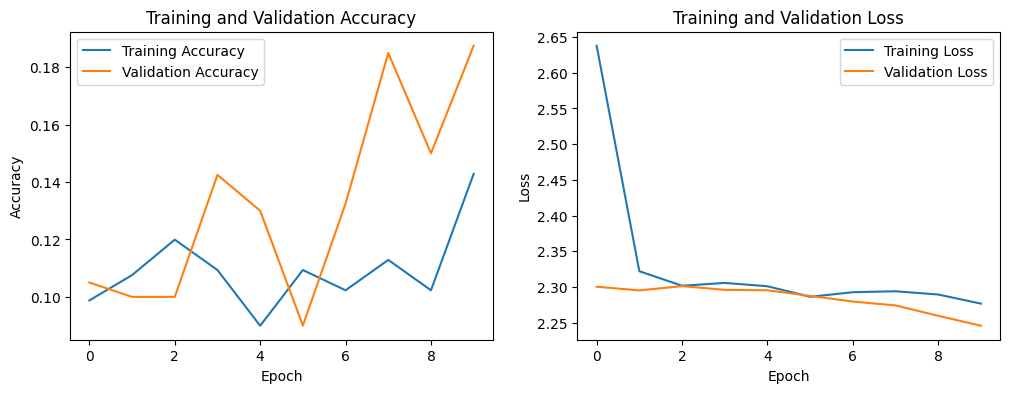

In [ ]:
# Visualization of training and validation performance
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# **D. Tuning TPU**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np


In [ ]:
try:
 tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # Get TPU resolver
 print('Running on TPU ', tpu.master())
except ValueError:
 print('TPU not found.')

NameError: name 'tf' is not defined

In [ ]:
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)

# Define TPU
strategy = tf.distribute.TPUStrategy(tpu)

In [ ]:
#Loading CIFAR10 Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# The image data is converted into floating point datatype and is then normalized for better computation.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
#Encodeing is done
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
#CNN model
with strategy.scope():
 model = models.Sequential()
 model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))#32 filters of 3*3 size
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(64, (3, 3), activation='relu'))#64 filters of #*# size
 model.add(layers.MaxPooling2D((2, 2)))
 model.add(layers.Conv2D(64, (3, 3), activation='relu'))
 model.add(layers.Flatten())
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(10, activation='softmax'))


In [ ]:
 model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:

model.fit(x_train, y_train, epochs=10, batch_size=128)


Epoch 1/10
391/391 [==============================] - 9s 14ms/step - loss: 1.6526 - accuracy: 0.3945
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.3103 - accuracy: 0.5292
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.1546 - accuracy: 0.5898
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0484 - accuracy: 0.6311
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9695 - accuracy: 0.6594
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9089 - accuracy: 0.6811
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8574 - accuracy: 0.7006
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8135 - accuracy: 0.7134
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7758 - accuracy: 0.7296
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7315 - accura

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)

# Convert the test accuracy to a percentage
test_acc_percentage = test_acc * 100

# Print the accuracy as a percentage
print(f'Test accuracy: {test_acc_percentage:.2f}%')


313/313 [==============================] - 5s 10ms/step - loss: 0.8607 - accuracy: 0.7009
Test accuracy: 70.09%
